<a href="https://colab.research.google.com/github/diecilyngonzales/DSP-LAB/blob/main/DSP_Problem_Set_Gonzales%2C_Diecilyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 1**

[150 points] Solve for the magnitude and angle of the linear transformations given. Provide necessary solutions numerically (hand-solved) and computationally (using a Python Program). Also provide the necessary solutions vector plots of the given matrices and their transformations (nos. 1-5).

$$
H = \frac{1}{\sqrt{2}}
\left(
\begin{array}{lcr}
    1 & 1 \\
    1 & -1
\end{array}
\right),
Y =
\left(
\begin{array}{lcr}
    0 & -i \\
    i & 0
\end{array}
\right),
O =
\left(
\begin{array}{lcr}
    1 & 0 \\
    1 & 1
\end{array}
\right)
$$

$1. H \cdot Y$<br/>
$2. Y \cdot H$<br/>
$3. H \cdot H$<br/>
$4. Y \cdot H \cdot O$<br/>
$5. H \cdot Y \cdot H \cdot O$

In [ ]:
import numpy as np
import math
import sympy
import matplotlib.pyplot as plt
from collections import namedtuple

# initialize as numpy.array objects
h = (1/math.sqrt(2)) * np.array([
    [1, 1],
    [1, -1]
])
y = np.array([
    [0, -1j],
    [1j, 0]
])
o = np.array([
    [1, 0],
    [1, 1]
])

def get_magnitude_and_angle(a: np.ndarray, b: np.ndarray):
    """
    Get the magnitude and angle of the linear transformation
    of two numpy arrays

    Parameters:
    ----------
    a: numpy.array
        The left numpy array
    b: numpy.array
        The right numpy array

    Return:
    -------
    Type: Tuple (magnitude, angle)
        Tuple representing the magnitude and angle of the
    numpy array. The angle is in radians
    """

    # get magnitude using np.linalg.norm()
    # https://www.geeksforgeeks.org/how-to-get-the-magnitude-of-a-vector-in-numpy/
    magnitude = round(np.linalg.norm(np.dot(a, b)), 6)

    # get the angle between the two vectors
    # https://stackoverflow.com/questions/2827393/angles-between-two-n-dimensional-vectors-in-python
    unit_a = a / np.linalg.norm(a)
    unit_b = b / np.linalg.norm(b)
    # angle = np.round(np.arccos(np.dot(unit_a, unit_b)), 6)
    angle = np.angle(np.dot(a, b))
    Output = namedtuple('Output', 'magnitude rad_angle deg_angle')
    return Output(magnitude=magnitude, rad_angle=angle[0][0], deg_angle=np.angle(np.dot(a, b), deg=True)[0][0])

def get_multi_dot_magnitude_and_angle(arrays: list[np.ndarray]) -> tuple:
    """
    Gets the magnitude and angle of arrays for more than two arrays.

    Parameter:
    ----------
    arrays: list[np.ndarray]
        list of numpy arrays to do multi_dot operation.

    Return:
    -------
    Type: Tuple (magnitude, angle)
        Tuple representing the magnitude and angle of the
    numpy array. The angle is in radians
    """
    # Getting the multi_dot product of more than two matrices
    # https://numpy.org/doc/stable/reference/generated/numpy.linalg.multi_dot.html
    dot_product = np.linalg.multi_dot(arrays=arrays)
    determinants = []
    for i in arrays:
        determinant = np.linalg.det(i)
        determinants.append(determinant)
    magnitude = round(np.linalg.norm(dot_product), 6)
    angle = np.angle(dot_product)
    Output = namedtuple('Output', 'magnitude rad_angle deg_angle')
    return Output(magnitude=magnitude, rad_angle=angle[0][0], deg_angle=np.angle(dot_product, deg=True)[0][0])

def get_answer(arrays: list[np.ndarray]) -> tuple:
    """Consolidates the functions above to reduce need for decision making in selecting the two functions."""

    if len(arrays) < 2:
        raise ValueError("The number of matrices in the list is insufficient to proceed with the operation. A minimum of two nd.array should be used to proceed.")

    if len(arrays) == 2:
        return get_magnitude_and_angle(arrays[0], arrays[1])
    else:
        return get_multi_dot_magnitude_and_angle(arrays)

def print_answer(arrays: list[np.ndarray]) -> None:
    """Prints answers from get_answer"""
    print("Magnitude:\n",get_answer(arrays=arrays).magnitude)
    print("Angle (in radians):\n", get_answer(arrays=arrays).rad_angle)
    print('Angle (in degrees):\n',get_answer(arrays=arrays).deg_angle)
    return None

num_1 = [h, y]
num_2 = [y, h]
num_3 = [h, h]
num_4 = [y, h, o]
num_5 = [h, y, h, o]

print("1. H . Y")
print(print_answer(num_1))
print("\n2. Y . H")
print(print_answer(num_2))
print("\n3. H . H")
print(print_answer(num_3))
print("\n4. Y . H . O")
print(print_answer(num_4))
print("\n5. H . Y . H . O")
print(print_answer(num_5))

1. H . Y
Magnitude:
 1.414214
Angle (in radians):
 1.5707963267948966
Angle (in degrees):
 90.0
None

2. Y . H
Magnitude:
 1.414214
Angle (in radians):
 -1.5707963267948966
Angle (in degrees):
 -90.0
None

3. H . H
Magnitude:
 1.414214
Angle (in radians):
 0.0
Angle (in degrees):
 0.0
None

4. Y . H . O
Magnitude:
 1.732051
Angle (in radians):
 0.0
Angle (in degrees):
 0.0
None

5. H . Y . H . O
Magnitude:
 1.732051
Angle (in radians):
 1.5707963267948966
Angle (in degrees):
 90.0
None


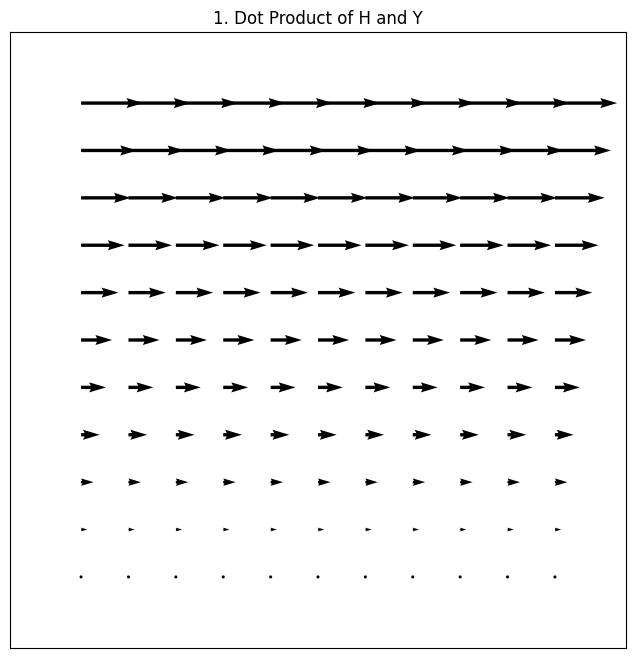

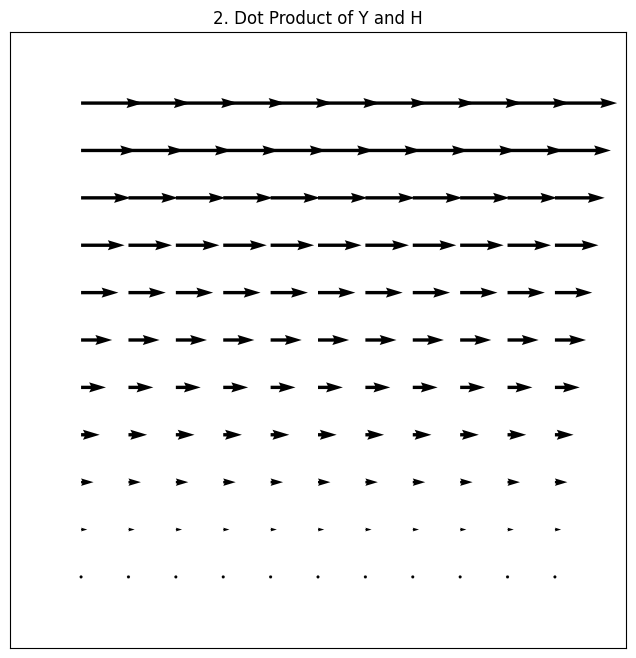

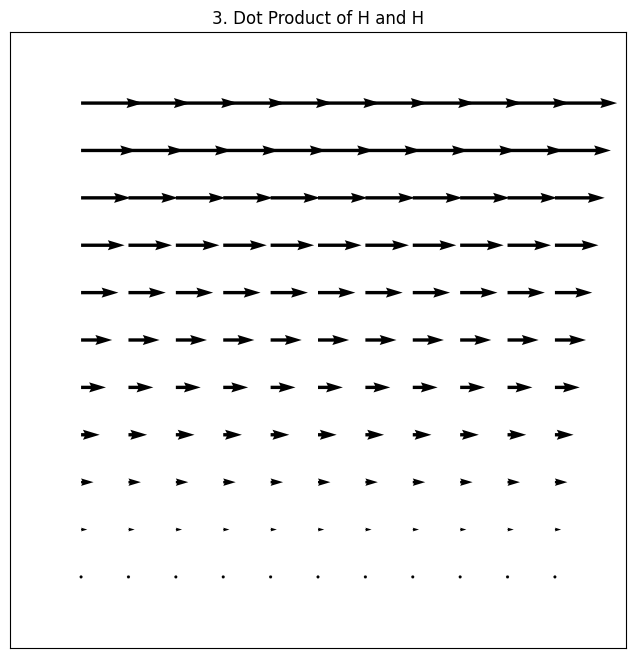

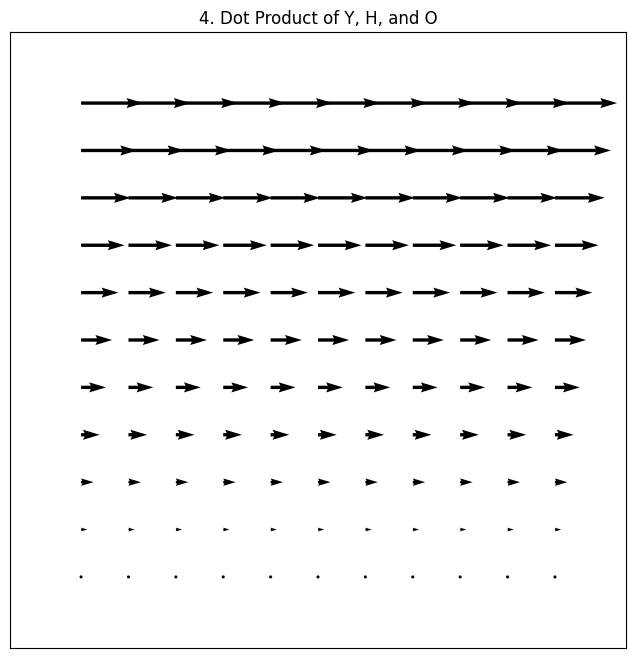

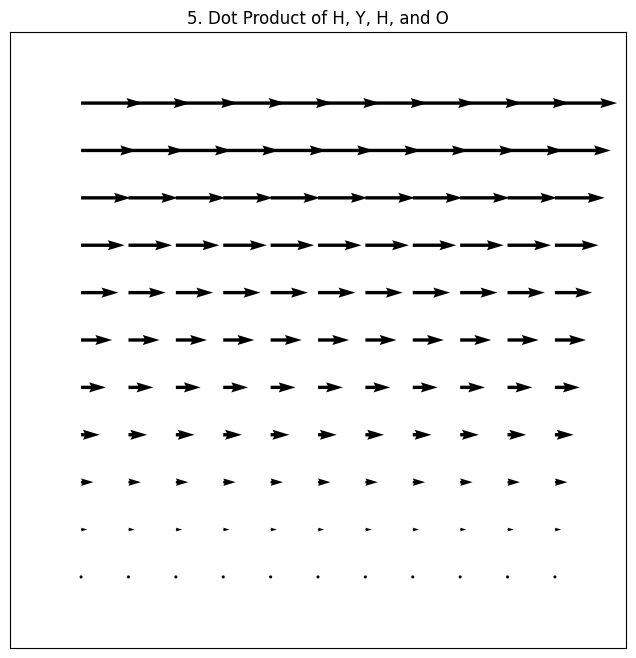

In [ ]:
def plot_the_complex_dot_product(magnitude_real, magnitude_imag, title):
    """Plots the complex number """
    x = np.arange(0, 2.2, 0.2)
    y = np.arange(0, 2.2, 0.2)
    X, Y = np.meshgrid(x, y)
    u = magnitude_real*Y
    v = magnitude_imag*X

    # creating plot
    fig, ax = plt.subplots(figsize =(14, 8))
    ax.quiver(X, Y, u, v)

    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.axis([-0.3, 2.3, -0.3, 2.3])
    ax.set_aspect('equal')
    ax.set_title(title)
    # show plot
    plt.show()

def show_plot(array, title):
    plot_the_complex_dot_product(get_answer(array).magnitude.real, get_answer(array).magnitude.imag, title)

show_plot(num_1,"1. Dot Product of H and Y")
show_plot(num_2,"2. Dot Product of Y and H")
show_plot(num_3,"3. Dot Product of H and H")
show_plot(num_4,"4. Dot Product of Y, H, and O")
show_plot(num_5,"5. Dot Product of H, Y, H, and O")

**Part 2.** [50 pts] Solve for the determinants of 𝐻 and 𝑌. Provide necessary solutions numerically (handsolved) and computationally (using a Python program).

In [ ]:
det_h = np.linalg.det(h)
det_y = np.linalg.det(y)
print("Determinant of H:", np.round(det_h, 4))
print("Determinant of Y:", np.round(det_y, 4))

Determinant of H: -1.0
Determinant of Y: (-1+0j)


**Part 3.** [50 pts] Determine whether the resulting linear transformations are linearly dependent. Provide
necessary solutions both numerically using determinants (hand-solved) and computationally (using a
Python program).

$$
1. \left(
\begin{array}{lcr}
    5 & 0 & 0 \\
    0 & 5 & 0 \\
    0 & 0 & 5
\end{array}
\right) \cdot
\left(
\begin{array}{lcr}
    1 & 0 & 5 \\
    2 & 7 & 6 \\
    6 & 4 & 7
\end{array}
\right)

2. \left(
\begin{array}{lcr}
    1 & 2 & 6 \\
    3 & 15 & 4 \\
    2 & 10 & 3
\end{array}
\right) \cdot
\left(
\begin{array}{lcr}
    5 & 2 & 4 \\
    6 & 2 & 4 \\
    0 & 1 & 1
\end{array}
\right)
$$

In [ ]:
arr_1_left = 5 * np.identity(3)
arr_1_right = np.array([
    [1, 0, 5],
    [2, 7, 6],
    [6, 4, 7]
])

arr_2_left = np.array([
    [1, 2, 6],
    [3, 15, 4],
    [2, 10, 3]
])
arr_2_right = np.array([
    [5, 2, 4],
    [6, 2, 4],
    [0, 1, 1]
])

arr_1_dot = np.dot(arr_1_left, arr_1_right)
arr_2_dot = np.dot(arr_2_left, arr_2_right)

# reference: https://stackoverflow.com/questions/64237996/how-to-determine-two-vectors-are-linearly-dependent-or-independent-in-python

_, indexes_1 = sympy.Matrix(arr_1_dot).T.rref()
_, indexes_2 = sympy.Matrix(arr_2_dot).T.rref()

if len(indexes_1) == 3:
    print("Number 1: ")
    print(arr_1_dot)
    print("Number 1 is linearly independent\n")
else:
    print("Number 1 is linearly dependent\n")
if len(indexes_2) == 3:
    print("Number 2: ")
    print(arr_2_dot)
    print("Number 2 is linearly independent")
else:
    print("Number 2 is linearly dependent")

Number 1: 
[[ 5.  0. 25.]
 [10. 35. 30.]
 [30. 20. 35.]]
Number 1 is linearly independent

Number 2: 
[[ 17  12  18]
 [105  40  76]
 [ 70  27  51]]
Number 2 is linearly independent


**Part 4.** [50 pts] Plot the signal corresponding to the following vectors whereas 𝑇 is the time vector and 𝐺
is the vector corresponding to the amplitudes of the signal.

$$
T = \left(
\begin{array}{lcr}
    0 & \pi/4 & \pi/2 & 3\pi/4 & \pi
\end{array}
\right);
G = \left(
\begin{array}{lcr}
    5 & 3 & 0 & -3 & 5
\end{array}
\right)
$$


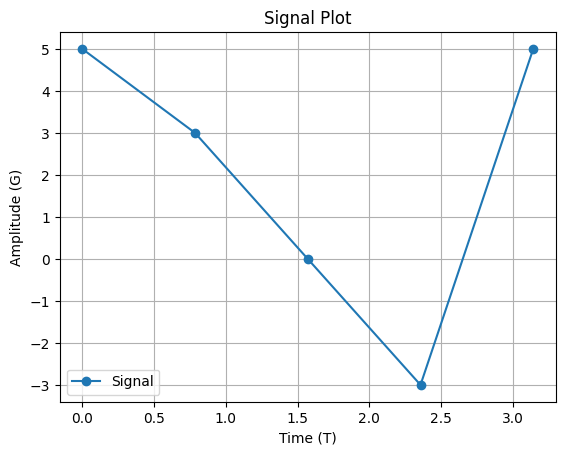

In [ ]:
t = np.array([0, np.pi / 4, np.pi / 2, 3 * np.pi/ 4, np.pi])
g = np.array([5, 3, 0, -3, 5])
x = np.arange(5)

plt.plot(t, g, label='Signal', marker='o', linestyle='-')

plt.xlabel('Time (T)')
plt.ylabel('Amplitude (G)')
plt.title('Signal Plot')
plt.legend()

plt.grid(True)
plt.show()